In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
Raw_Data =pd.read_csv('survey.csv')
Raw_Data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
anonymity=Raw_Data[Raw_Data['anonymity'].str.contains("Yes")]
anonymity.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
7,8/27/2014 11:32,39,M,Canada,NaN,NaN,No,No,Never,5-Jan,...,Don't know,No,No,No,No,No,No,No,No,NaN
18,8/27/2014 11:34,46,male,United States,MD,Yes,Yes,No,Sometimes,5-Jan,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,NaN
19,8/27/2014 11:35,36,Male,France,NaN,Yes,Yes,No,NaN,25-Jun,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN
21,8/27/2014 11:35,31,male,United States,NC,Yes,No,No,Never,5-Jan,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN


In [4]:
selectlocation_mentalhealth =anonymity.groupby(['Country'])['anonymity'].count().reset_index(name="count")
selectlocation_mentalhealth .sort_values("count", axis=0, ascending = False)
selectlocation_mentalhealth .head(100)

,Country,count
0,Australia,6
1,Austria,1
2,"Bahamas, The",1
3,Belgium,1
4,Canada,22
5,Costa Rica,1
6,Croatia,2
7,France,3
8,Germany,17
9,Greece,1


In [5]:
anonymity_Unitedstate=anonymity[anonymity['Country'].str.contains("United States")]
anonymity_Unitedstate.head(150)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
18,8/27/2014 11:34,46,male,United States,MD,Yes,Yes,No,Sometimes,5-Jan,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,NaN
21,8/27/2014 11:35,31,male,United States,NC,Yes,No,No,Never,5-Jan,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
24,8/27/2014 11:36,33,male,United States,CA,No,Yes,Yes,Rarely,26-100,...,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
33,8/27/2014 11:39,42,Male,United States,WA,No,Yes,Yes,Sometimes,26-100,...,Very easy,Maybe,No,Some of them,Some of them,Maybe,Yes,Don't know,No,I selected my current employer based on its po...
39,8/27/2014 11:42,35,M,United States,TX,No,No,Yes,Rarely,More than 1000,...,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
45,8/27/2014 11:43,38,Female,United States,TX,No,Yes,Yes,Sometimes,26-100,...,Somewhat easy,No,No,Some of them,Yes,No,No,Yes,No,Our health plan has covered my psychotherapy a...
50,8/27/2014 11:44,22,M,United States,TX,No,Yes,Yes,Often,25-Jun,...,Very difficult,Maybe,No,No,No,No,Maybe,Don't know,No,NaN
55,8/27/2014 11:46,27,Male-ish,United States,NY,No,Yes,Yes,Rarely,26-100,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
58,8/27/2014 11:47,26,Male,United States,TN,No,No,No,NaN,26-100,...,Somewhat easy,No,No,Some of them,Yes,Maybe,Yes,Don't know,No,NaN


In [6]:
anonymity_Unitedstate=anonymity_Unitedstate.groupby(['family_history'])['family_history'].count().reset_index(name="count")
anonymity_Unitedstate.head(100)

,family_history,count
0,No,128
1,Yes,109


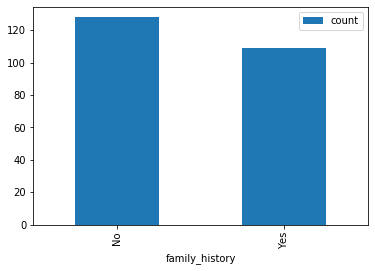

In [7]:
anonymity_Unitedstate.plot.bar(x='family_history')